## Content

#### 1. Import Modules 
#### 2. Import Data
#### 3. Explore Data
#### 4. Word2Vec
#### 5. Mean of Words Model

### 1. Import Modules

In [1]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [2]:
import pickle

In [3]:
import src.process as process
import src.explore as explore
import src.model as model

### 2. Import Data

##### Import and merge raw data into one dataframe

In [4]:
start_yr = 2016
end_yr = 2020
path_blueprint = r'raw\data_{}.xlsx'
raw_data = process.merge_import_from_xlsx(start_yr, end_yr, path_blueprint)

#### Clean and Select relevant data for the classification task

In [5]:
data = process.select_clean_data(raw_data, min_instances = 50)

#### Split data into train and test set

In [6]:
train_data, test_data = process.stratified_train_test_split(data)

#### Tokenize sentence

In [13]:
tokenized_train_data = process.tokenize(train_data)

### 3. Explore Data

#### Plot class frequencies in training dataset

<AxesSubplot:xlabel='Politikbereich'>

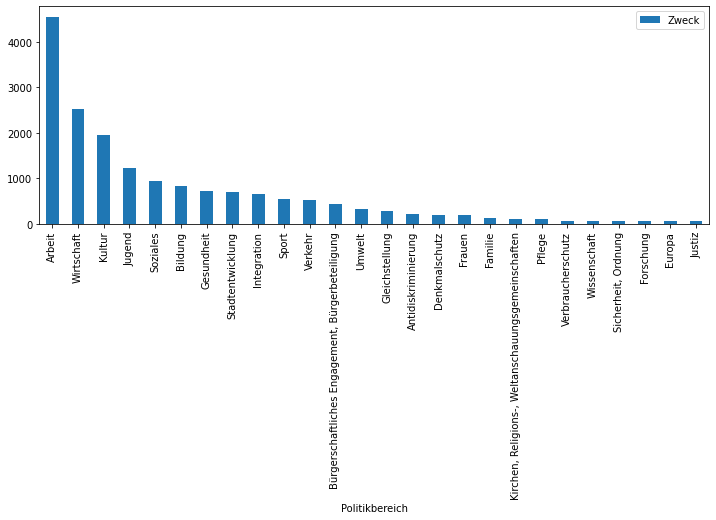

In [14]:
explore.class_frequency(tokenized_train_data)

#### Plot word frequencies for some classes

In [ ]:
tokenized_train_data = process.tokenize(train_data)

In [ ]:
explore.word_frequency(tokenized_train_data, category = 'Arbeit')

In [ ]:
explore.word_frequency(tokenized_train_data, category = 'Bildung')

In [ ]:
explore.word_frequency(tokenized_train_data, category = 'Umwelt')

### 4. Word2Vec

In [ ]:
tokenized_train_data = process.tokenize(train_data)
lookup_table = model.create_w2v_lookup(tokenized_train_data, window_size = 5, negative_samples = 20, embedding_dim = 128)

In [ ]:
pickle.dump(lookup_table, open( "lookup.pkl", "wb" ))

###  5. Mean of Words Model

In [7]:
lookup_table = lookup_table = pickle.load(open( "lookup.pkl", "rb" ))

In [8]:
mean_model_data =  process.create_mean_word_vector(train_data, lookup_table, tokenized = False)

C:\Users\gmoha\OneDrive\Desktop\LearningJourney\Projects\berlinExpenditureClassification\src\process.py:188: RuntimeWarning: Mean of empty slice.
  mean_model_data['mean_word_vector'] = mean_model_data['vectorized_sentence'].apply(lambda row: np.array(lookup_table.iloc[row]['vector'].tolist()).mean(axis = 0))


In [9]:
clf, performance = model.mean_word_model(mean_model_data, test = True, dim_reduction = False)

(<AxesSubplot:>, <AxesSubplot:xlabel='Politikbereich'>)

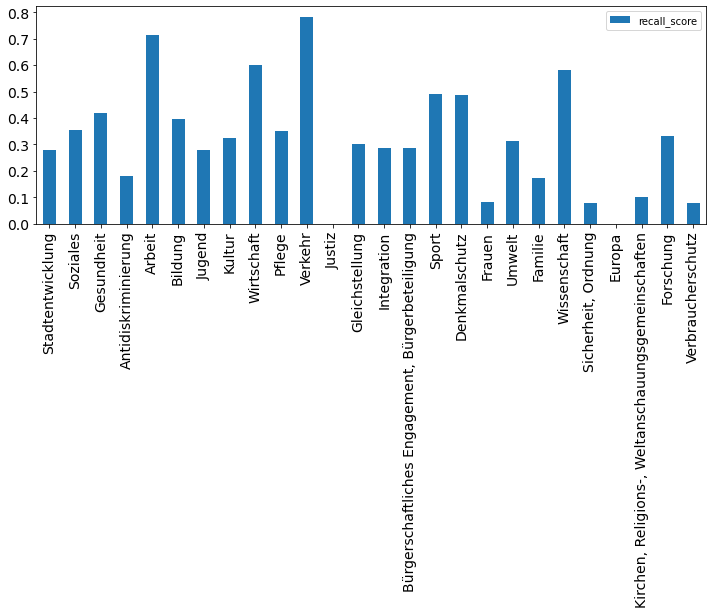

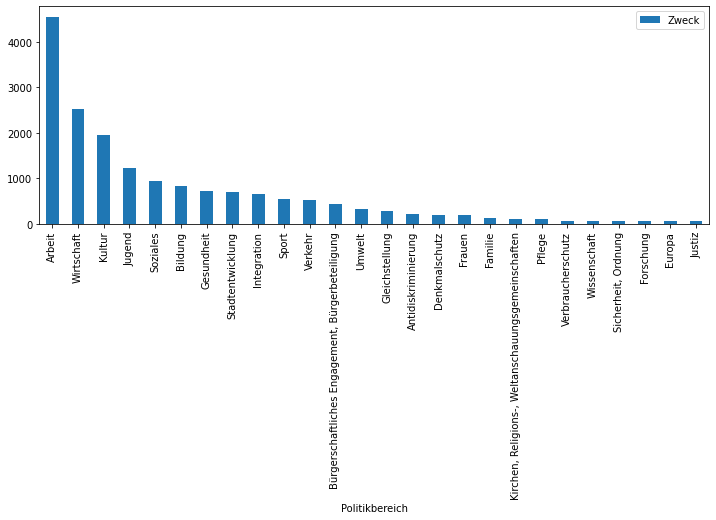

In [16]:
performance.plot.bar(y = 'recall_score', figsize = (12,4), fontsize = 14), explore.class_frequency(tokenized_train_data)